In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# reading file 


%time data = pd.read_csv("train_bf.csv")

data.shape

CPU times: total: 359 ms
Wall time: 595 ms


(550068, 12)

In [3]:
# checking the sample of the data

data.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
449603,1003295,P00230942,M,18-25,18,B,1,0,5,14.0,NaN,5437
302699,1004578,P00221942,M,26-35,0,A,4+,0,1,8.0,NaN,8215
236812,1000533,P00313342,M,26-35,12,A,1,0,5,NaN,NaN,5478
58144,1002978,P00070942,M,36-45,20,C,1,0,3,5.0,16.0,10878
514161,1001211,P00220342,M,18-25,4,A,1,0,5,NaN,NaN,8654
526715,1003195,P00182242,M,18-25,4,B,4+,0,1,5.0,6.0,8189
262634,1004423,P00115642,M,18-25,4,C,1,0,8,14.0,NaN,7960
23972,1003716,P00194642,M,18-25,12,B,3,1,1,6.0,13.0,15289
238040,1000746,P00130442,F,18-25,19,B,3,0,3,5.0,NaN,5366
239838,1001019,P00115242,M,36-45,1,A,4+,1,5,8.0,NaN,5249


In [4]:
# information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# decsribing the data

data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
# checking the datatypes of attributes of dataset

data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
# checking if there is any NULL values present in the dataset

data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

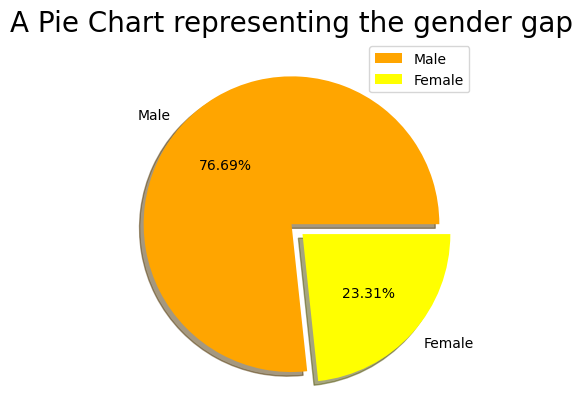

In [9]:
# pie chart 

size = [405380, 123197]
labels = ['Male', 'Female']
colors = ['orange', 'yellow']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

In [10]:
# finding the maximum purchase in both male and female

data.groupby(data.Gender).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [11]:
# finding the minimum purchase in both male and female

data.groupby(data.Gender).Purchase.min()

Gender
F    12
M    12
Name: Purchase, dtype: int64

In [12]:
# checking dependency of gender on purchase

data[['Gender', 'Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


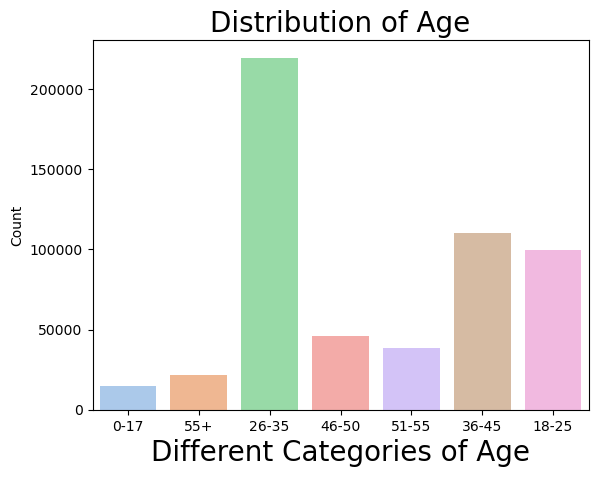

In [13]:
# visualizing the age of customers

sns.countplot (data=data, x= 'Age', palette = 'pastel')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()

In [14]:
# checing the dependency of age attribute with purchasing power
data[['Age', 'Purchase']].groupby('Age').mean()

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


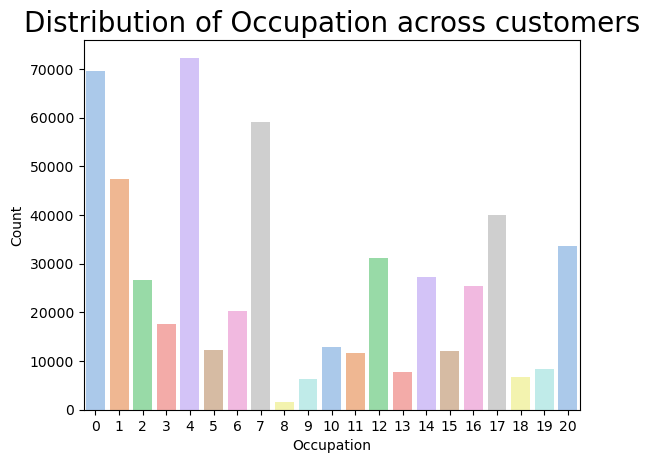

In [15]:
# visualizing the occupation of customers

sns.countplot(data=data,x = 'Occupation', palette = 'pastel')
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


In [16]:

# checking the dependency of occupation on purchasing power

data[['Occupation', 'Purchase']].groupby('Occupation').mean()

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


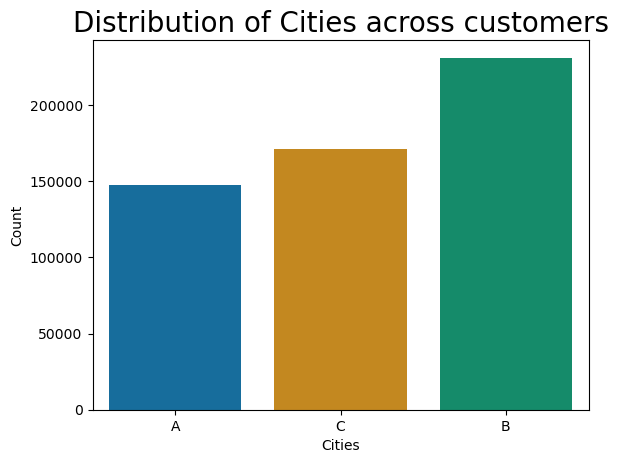

In [17]:
# visulaizing the cities the customers are from

sns.countplot(data=data,x='City_Category', palette = 'colorblind')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

In [18]:
# checking the dependency of cities where customer live with the purchasing power

data[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


In [19]:

# we need to label the 4+ to index number 5 to visualize the stay of customers in a city
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4,})

data['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

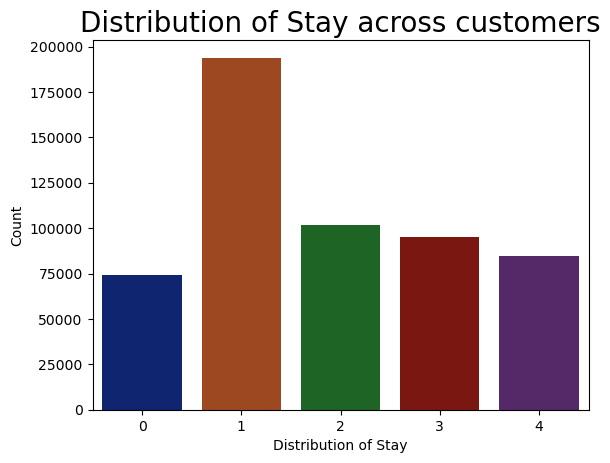

In [20]:
# visualizing the stay in current years


sns.countplot(data = data,x = 'Stay_In_Current_City_Years', palette = 'dark')
plt.title('Distribution of Stay across customers', fontsize = 20)
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

In [21]:
# checking the dependency of stay in purchasing power

data[['Stay_In_Current_City_Years', 'Purchase']].groupby('Stay_In_Current_City_Years').mean()

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
4,9275.598872


In [22]:
# visualizing the Marital Status

data['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

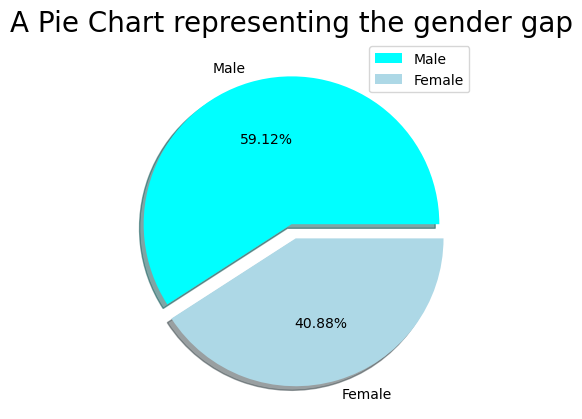

In [23]:
# pie chart 

size = [317817, 219760]
labels = ['Male', 'Female']
colors = ['cyan', 'lightblue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

In [24]:
# checking the dependency of marital status on purchasing power

data[['Marital_Status', 'Purchase']].groupby('Marital_Status').mean()

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


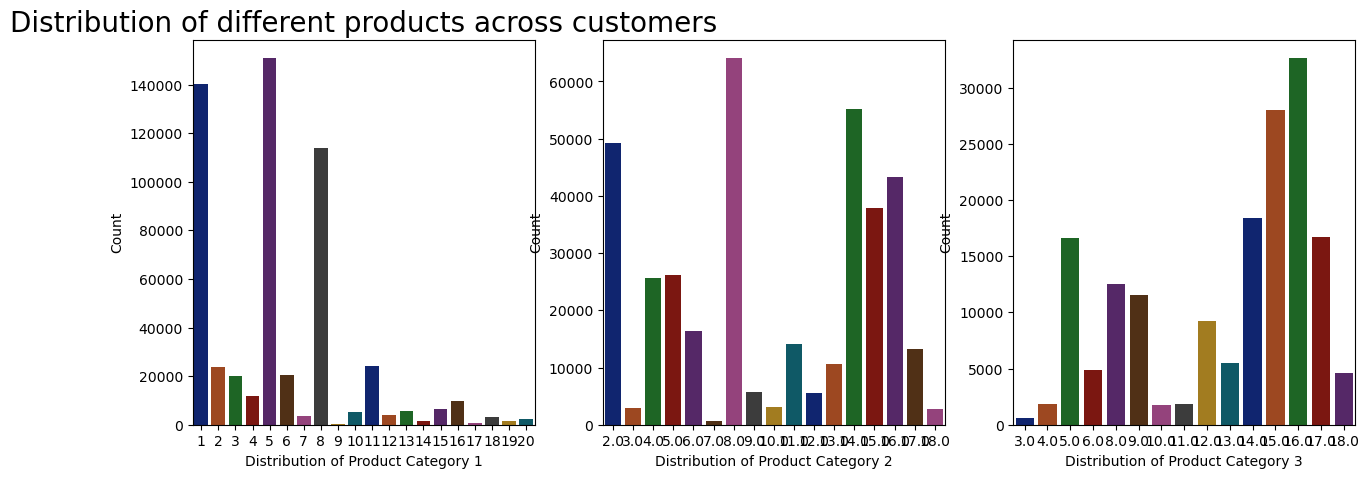

In [25]:
# visualizing the product category 1

plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(131)
sns.countplot(data=data,x ='Product_Category_1', palette = 'dark')
plt.title('Distribution of different products across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(data= data,x ='Product_Category_2', palette = 'dark')
#plt.title('Distribution of product category 2 across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(data=data,x='Product_Category_3', palette = 'dark')
#plt.title('Distribution of product category 3 across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')


plt.show()

In [26]:
# checking the dependency of product 1 on purchasing power

data[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


In [27]:
# checking the dependency of product 1 on purchasing power

data[['Product_Category_2', 'Purchase']].groupby('Product_Category_2').mean()

,Purchase
Product_Category_2,
2.0,13619.356401
3.0,11235.359570
4.0,10215.192001
5.0,9027.821574
6.0,11503.551379
7.0,6884.683706
8.0,10273.259518
9.0,7277.006851
10.0,15648.729543


In [28]:
# checking the dependency of product 1 on purchasing power

data[['Product_Category_3', 'Purchase']].groupby('Product_Category_3').mean()

,Purchase
Product_Category_3,
3.0,13939.696574
4.0,9794.386667
5.0,12117.786889
6.0,13194.311043
8.0,13024.918882
9.0,10431.697210
10.0,13505.813441
11.0,12091.437673
12.0,8715.512762


The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


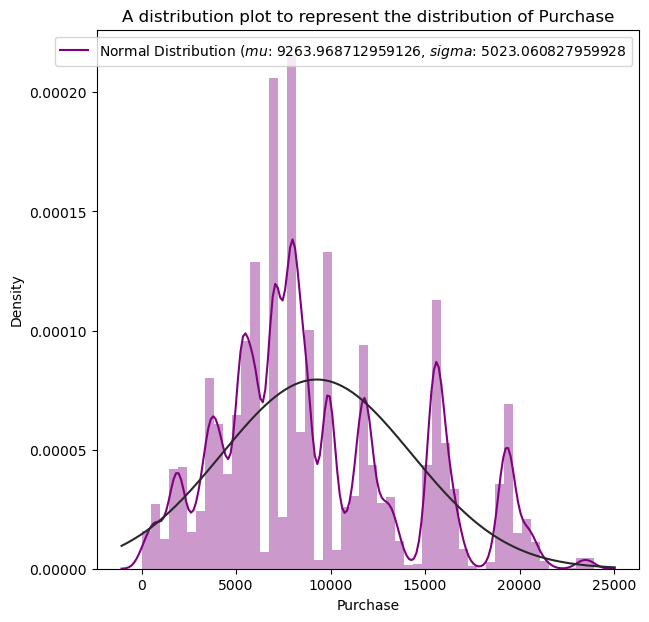

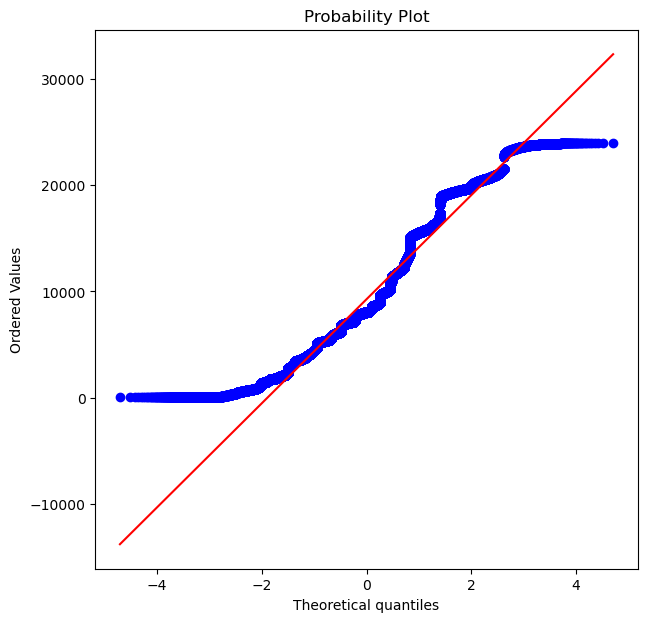

In [29]:
# visualizing the purchase attribute which is our target variable

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(data['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(data['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot
stats.probplot(data['Purchase'], plot = plt)
plt.show()

### S-shaped Curve:

If the data points form an S-shape, it indicates that the data has heavier tails than the theoretical distribution (e.g., data has more extreme values).

In [30]:
# looking at the columns of the dataset

data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [31]:
# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = data['User_ID']
Product_ID = data['Product_ID']

data = data.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
data.shape

(550068, 10)

In [32]:
# filling the missing values

data['Product_Category_2'].fillna(0, inplace = True)
data['Product_Category_3'].fillna(0, inplace = True)

data.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [33]:
# making dummies of variables
# performing one hot encoding


data = pd.get_dummies(data)

# checking the shape of new dataset
data.shape

(550068, 19)

In [34]:


data.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,10,2,0,3,0.0,0.0,8370,1,0,1,0,0,0,0,0,0,1,0,0
1,10,2,0,1,6.0,14.0,15200,1,0,1,0,0,0,0,0,0,1,0,0
2,10,2,0,12,0.0,0.0,1422,1,0,1,0,0,0,0,0,0,1,0,0
3,10,2,0,12,14.0,0.0,1057,1,0,1,0,0,0,0,0,0,1,0,0
4,16,4,0,8,0.0,0.0,7969,0,1,0,0,0,0,0,0,1,0,0,1


In [35]:
# splitting the data into dependent and independents sets

y = data['Purchase']

# now removing the purchase column from the dataset
data = data.drop(['Purchase'], axis = 1)

x = data

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (550068, 18)
Shape of y:  (550068,)


In [36]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (385047, 18)
Shape of x_test:  (165021, 18)
Shape of y_train:  (385047,)
Shape of y_test:  (165021,)


In [37]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Modelling**

In [38]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4632.125289994404
R2 Score: 0.15364329307650648


In [39]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4632.1360205001565
R2 Score: 0.15363937183281684


In [40]:
# predictive analytics
# regression analysis
# E

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4663.080544204063
R2 Score: 0.14229354476512635


In [41]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2925.10308824043
R2 Score: 0.6624988962921545
